In [123]:
# цель проекта - найти зависимость успеваемости по математике от условий жизни
# первичный анализ каждой колонки
# удаление выбросов
# преобразование данных
# анализ числовых колонок
# анализ номинативных коолонок
# корреляционный анализ
# отбор статистически значимых колонок

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [125]:
def show_outliers(field, brd_left, brd_right, brd_sanity):
    IQR = field.quantile(0.75) - field.quantile(0.25)
    perc25 = field.quantile(0.25)
    perc75 = field.quantile(0.75)

    print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

    field.loc[field.between(
    perc25 - 1.5*IQR,
    perc75 + 1.5*IQR)].hist(bins = 16, range = (brd_left, brd_right), label = 'IQR')

    field.loc[stud.age <= brd_right].hist(
    alpha = 0.5, bins = 16, range = (brd_left, brd_right), label = 'Здравый смысл')

    plt.legend();

In [126]:
def get_boxplot(field):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=field, y='score', 
                data=stud.loc[stud.loc[:, field].isin(stud.loc[:, field].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + field)
    plt.show()

In [127]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [128]:
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

In [129]:
display(stud)
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [130]:
stud.school.value_counts(dropna=False)

GP    349
MS     46
Name: school, dtype: int64

In [131]:
stud.sex.value_counts(dropna=False)

F    208
M    187
Name: sex, dtype: int64

In [132]:
stud.age.value_counts(dropna=False)

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

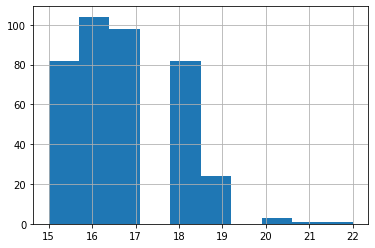

In [133]:
stud.age.hist()
stud.age.describe()

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


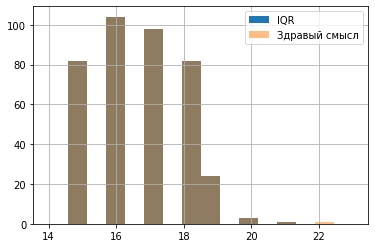

In [134]:
show_outliers(stud.age, 14, 23, 23)

In [135]:
stud=stud.loc[stud.age<=21]

In [136]:
stud.address.value_counts(dropna=False)

U      294
R       83
NaN     17
Name: address, dtype: int64

In [137]:
stud.famsize.value_counts(dropna=False)

GT3    260
LE3    107
NaN     27
Name: famsize, dtype: int64

In [138]:
stud.Pstatus.value_counts(dropna=False)

T      313
NaN     45
A       36
Name: Pstatus, dtype: int64

In [139]:
stud.Medu.value_counts(dropna=False)

4.0    131
2.0    102
3.0     96
1.0     59
0.0      3
NaN      3
Name: Medu, dtype: int64

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


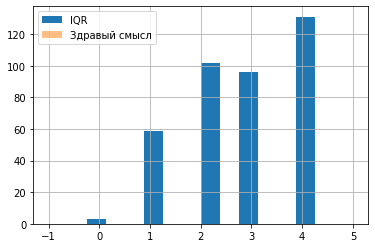

In [140]:
show_outliers(stud.Medu, -1, 5, 5)

In [141]:
stud.Fedu.value_counts(dropna=False)

2.0     106
3.0      96
4.0      88
1.0      77
NaN      24
0.0       2
40.0      1
Name: Fedu, dtype: int64

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


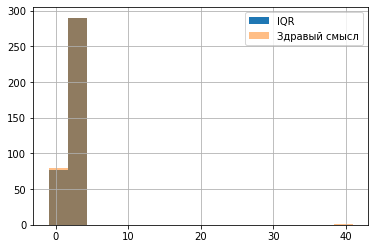

In [142]:
show_outliers(stud.Fedu, -1, 41, 4)

In [143]:
stud=stud.loc[stud.Fedu<=4] #отсекаем ошибку в данных со значением 40

In [144]:
stud.Mjob.value_counts(dropna=False)

other       125
services     89
at_home      57
teacher      48
health       31
NaN          19
Name: Mjob, dtype: int64

In [145]:
stud.Fjob.value_counts(dropna=False)

other       189
services     93
NaN          34
teacher      26
at_home      14
health       13
Name: Fjob, dtype: int64

In [146]:
stud.reason.value_counts(dropna=False)

course        128
reputation     98
home           96
other          31
NaN            16
Name: reason, dtype: int64

In [147]:
stud.guardian.value_counts(dropna=False)

mother    235
father     78
NaN        30
other      26
Name: guardian, dtype: int64

In [148]:
stud.traveltime.value_counts(dropna=False)

1.0    224
2.0     92
NaN     25
3.0     21
4.0      7
Name: traveltime, dtype: int64

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


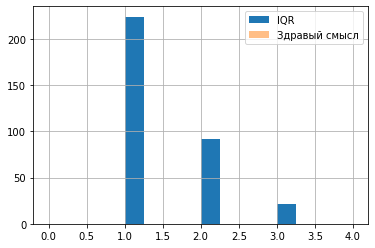

In [149]:
show_outliers(stud.traveltime, 0, 4, 4)

In [150]:
stud.studytime.value_counts(dropna=False)

2.0    182
1.0     97
3.0     58
4.0     25
NaN      7
Name: studytime, dtype: int64

In [151]:
stud.failures.value_counts(dropna=False)

0.0    277
1.0     45
NaN     19
2.0     14
3.0     14
Name: failures, dtype: int64

In [152]:
stud.schoolsup.value_counts(dropna=False)

no     313
yes     47
NaN      9
Name: schoolsup, dtype: int64

In [153]:
stud.famsup.value_counts(dropna=False)

yes    204
no     130
NaN     35
Name: famsup, dtype: int64

In [154]:
stud.paid.value_counts(dropna=False)

no     187
yes    145
NaN     37
Name: paid, dtype: int64

In [155]:
stud.activities.value_counts(dropna=False)

yes    180
no     175
NaN     14
Name: activities, dtype: int64

In [156]:
stud.nursery.value_counts(dropna=False)

yes    279
no      74
NaN     16
Name: nursery, dtype: int64

In [157]:
stud.higher.value_counts(dropna=False)

yes    333
no      18
NaN     18
Name: higher, dtype: int64

In [158]:
stud.internet.value_counts(dropna=False)

yes    282
no      54
NaN     33
Name: internet, dtype: int64

In [159]:
stud.romantic.value_counts(dropna=False)

no     226
yes    115
NaN     28
Name: romantic, dtype: int64

In [160]:
stud.famrel.value_counts(dropna=False)

 4.0    168
 5.0     94
 3.0     59
 NaN     24
 2.0     16
 1.0      7
-1.0      1
Name: famrel, dtype: int64

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5].


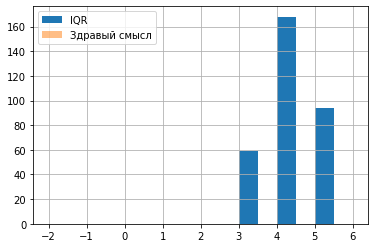

In [161]:
show_outliers(stud.famrel, -2, 6, 6)

In [162]:
stud=stud.loc[stud.famrel>=1] #отсекаем ошибку в данных со значением -1

In [163]:
stud.freetime.value_counts(dropna=False)

3.0    134
4.0     96
2.0     54
5.0     34
1.0     17
NaN      9
Name: freetime, dtype: int64

25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,  Границы выбросов: [1.5, 5.5].


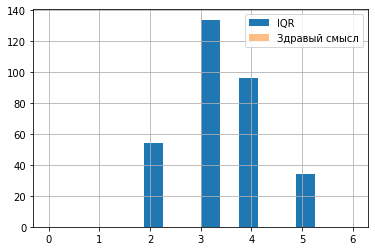

In [164]:
show_outliers(stud.freetime, 0, 6, 6)

In [165]:
stud.goout.value_counts(dropna=False)

3.0    115
2.0     87
4.0     71
5.0     44
1.0     19
NaN      8
Name: goout, dtype: int64

In [166]:
stud.health.value_counts(dropna=False)

5.0    111
3.0     81
4.0     58
1.0     41
2.0     40
NaN     13
Name: health, dtype: int64

In [167]:
stud.absences.value_counts(dropna=False)

0.0      95
2.0      54
4.0      47
6.0      27
8.0      21
10.0     14
NaN      12
12.0     11
14.0      9
3.0       8
16.0      6
7.0       5
5.0       4
18.0      4
22.0      3
20.0      3
15.0      2
1.0       2
9.0       2
54.0      1
25.0      1
385.0     1
26.0      1
56.0      1
212.0     1
28.0      1
13.0      1
21.0      1
38.0      1
40.0      1
23.0      1
11.0      1
17.0      1
24.0      1
Name: absences, dtype: int64

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


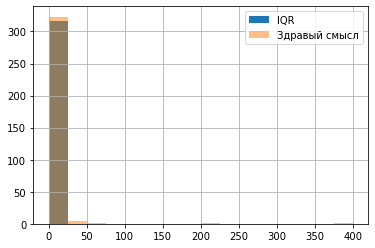

In [168]:
show_outliers(stud.absences, 0, 400, 400)

In [169]:
stud=stud.loc[stud.absences<=20] #отсекаем выбросы

In [170]:
stud.score.value_counts(dropna=False)

50.0     50
55.0     38
0.0      30
65.0     27
60.0     25
75.0     25
70.0     23
40.0     21
45.0     17
80.0     16
30.0     13
90.0      8
35.0      8
25.0      5
NaN       5
85.0      3
95.0      2
100.0     1
Name: score, dtype: int64

25-й перцентиль: 45.0, 75-й перцентиль: 66.25, IQR: 21.25,  Границы выбросов: [13.125, 98.125].


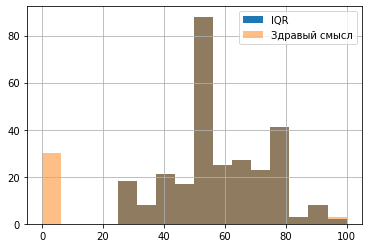

In [171]:
show_outliers(stud.score, 0, 100, 100)

In [172]:
stud=stud.loc[stud.score<=98.125] #отсекаем выбросы

In [173]:
stud=stud.loc[13.125<=stud.score] #отсекаем выбросы

In [174]:
nominative_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob','Fjob','reason','guardian','schoolsup',
                      'famsup','paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

In [175]:
for col in nominative_columns:
    print('Кол-во уникальных значений в колонке '+col+' равно '+ str(stud[col].nunique()))

Кол-во уникальных значений в колонке school равно 2
Кол-во уникальных значений в колонке sex равно 2
Кол-во уникальных значений в колонке address равно 2
Кол-во уникальных значений в колонке famsize равно 2
Кол-во уникальных значений в колонке Pstatus равно 2
Кол-во уникальных значений в колонке Mjob равно 5
Кол-во уникальных значений в колонке Fjob равно 5
Кол-во уникальных значений в колонке reason равно 4
Кол-во уникальных значений в колонке guardian равно 3
Кол-во уникальных значений в колонке schoolsup равно 2
Кол-во уникальных значений в колонке famsup равно 2
Кол-во уникальных значений в колонке paid равно 2
Кол-во уникальных значений в колонке activities равно 2
Кол-во уникальных значений в колонке nursery равно 2
Кол-во уникальных значений в колонке higher равно 2
Кол-во уникальных значений в колонке internet равно 2
Кол-во уникальных значений в колонке romantic равно 2


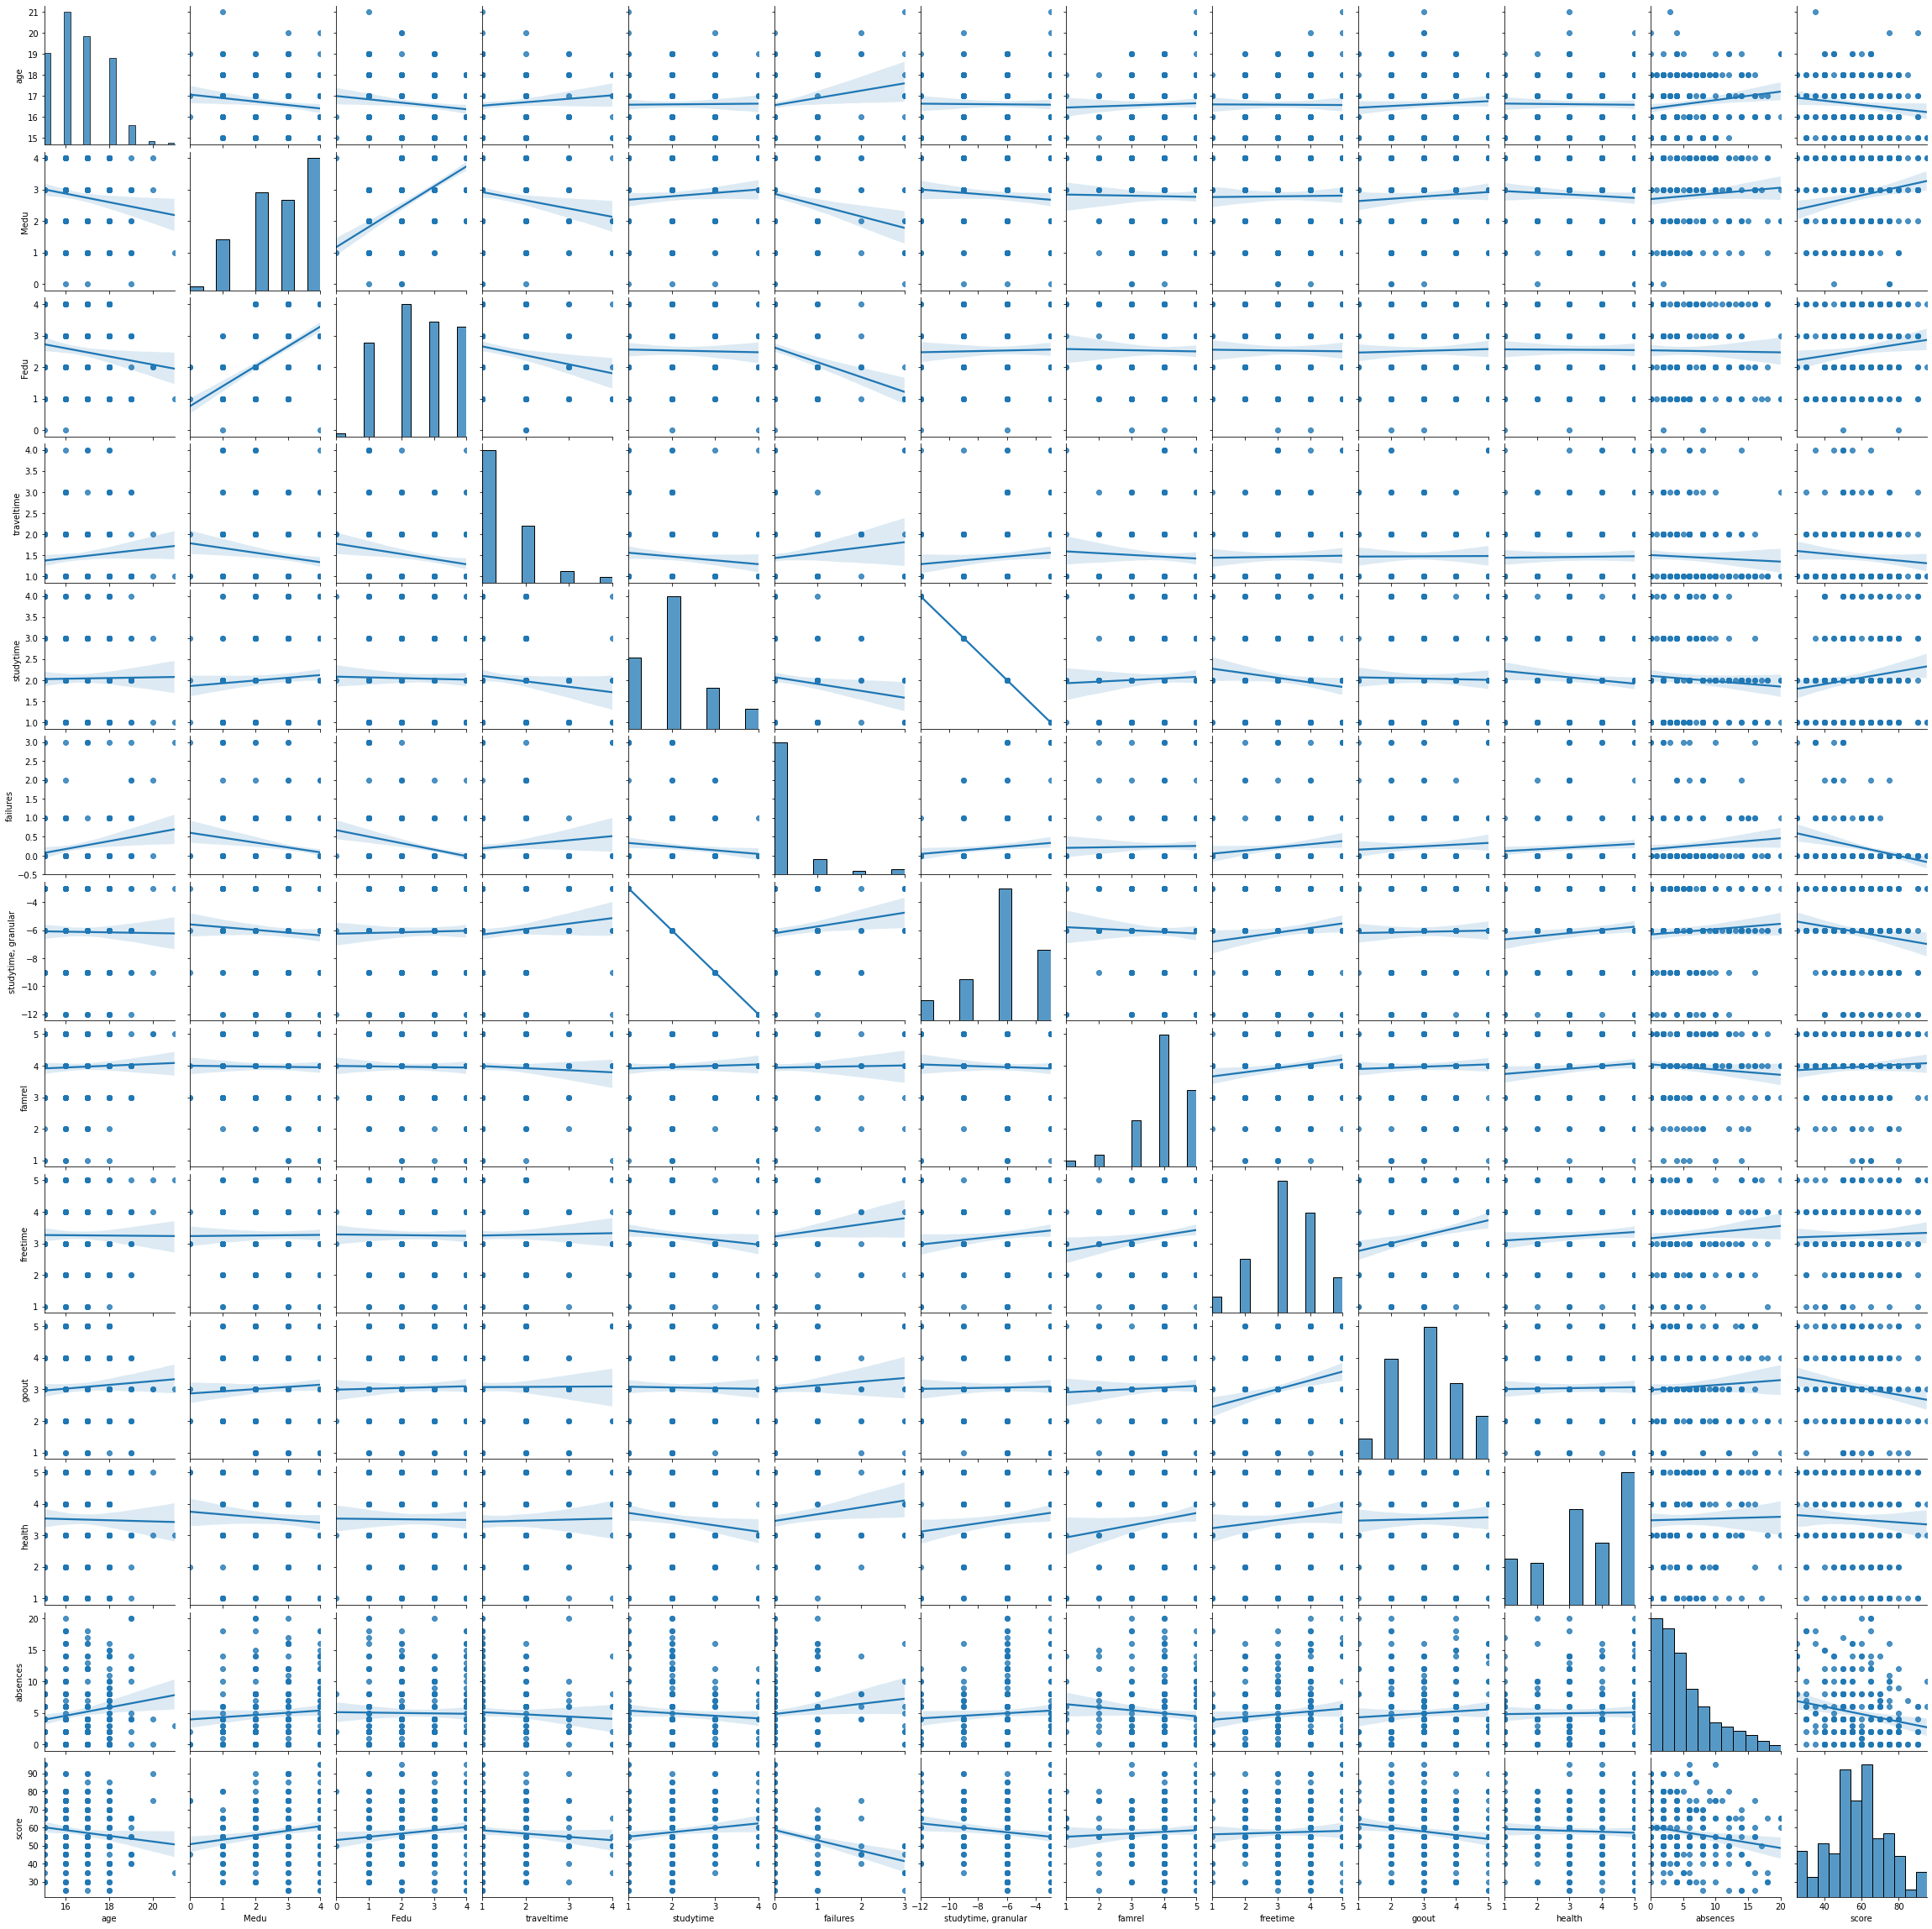

In [176]:
sns.pairplot(stud, kind = 'reg') #корреляционный анализ

In [177]:
stud.corr() #получаем коэффициенты корреляции

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.149417,-0.142582,0.097401,0.011808,0.189914,-0.011808,0.038111,-0.006335,0.067550,-0.016388,0.161923,-0.124370
Medu,-0.149417,1.000000,0.634598,-0.171683,0.083737,-0.215589,-0.083737,-0.014983,0.010176,0.070493,-0.068847,0.079815,0.179680
Fedu,-0.142582,0.634598,1.000000,-0.186539,-0.022503,-0.283749,0.022503,-0.015645,-0.011684,0.027234,-0.008261,-0.014741,0.128639
traveltime,0.097401,-0.171683,-0.186539,1.000000,-0.108613,0.116681,0.108613,-0.052738,0.017549,0.004970,0.017390,-0.052435,-0.087424
studytime,0.011808,0.083737,-0.022503,-0.108613,1.000000,-0.125756,-1.000000,0.039869,-0.126856,-0.018490,-0.122449,-0.072271,0.137019
failures,0.189914,-0.215589,-0.283749,0.116681,-0.125756,1.000000,0.125756,0.017056,0.126545,0.071087,0.101940,0.108375,-0.250144
"studytime, granular",-0.011808,-0.083737,0.022503,0.108613,-1.000000,0.125756,1.000000,-0.039869,0.126856,0.018490,0.122449,0.072271,-0.137019
famrel,0.038111,-0.014983,-0.015645,-0.052738,0.039869,0.017056,-0.039869,1.000000,0.147057,0.042853,0.127256,-0.089083,0.053659
freetime,-0.006335,0.010176,-0.011684,0.017549,-0.126856,0.126545,0.126856,0.147057,1.000000,0.260997,0.092880,0.093094,0.031232
goout,0.067550,0.070493,0.027234,0.004970,-0.018490,0.071087,0.018490,0.042853,0.260997,1.000000,0.020034,0.069976,-0.147181


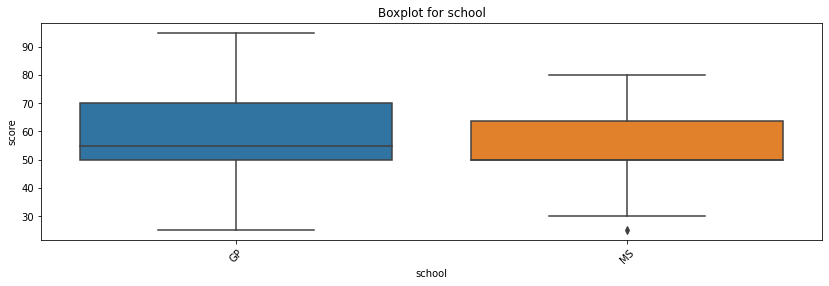

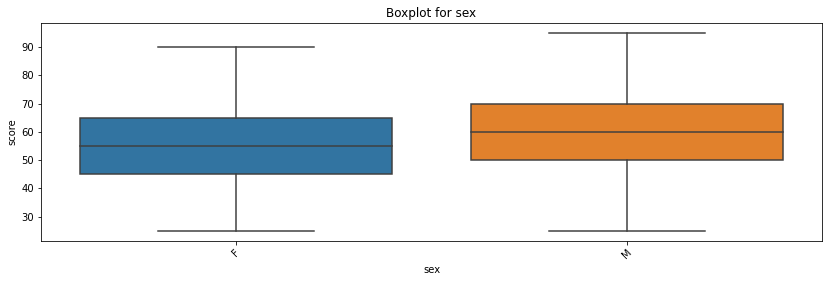

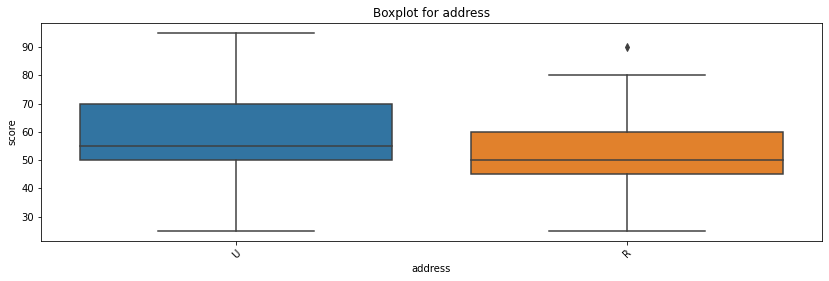

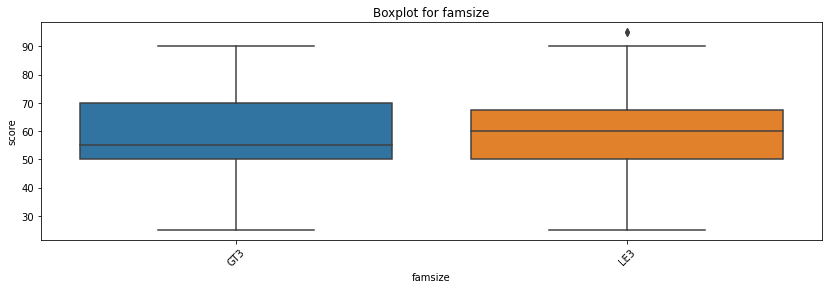

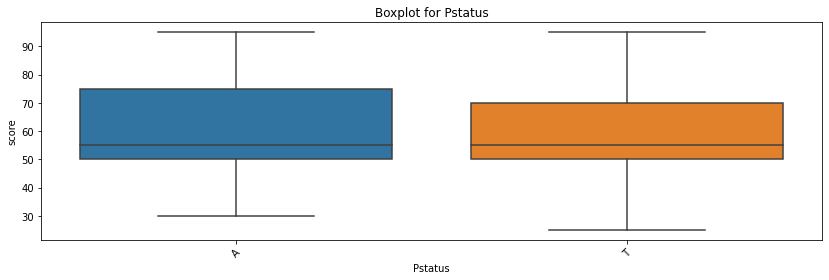

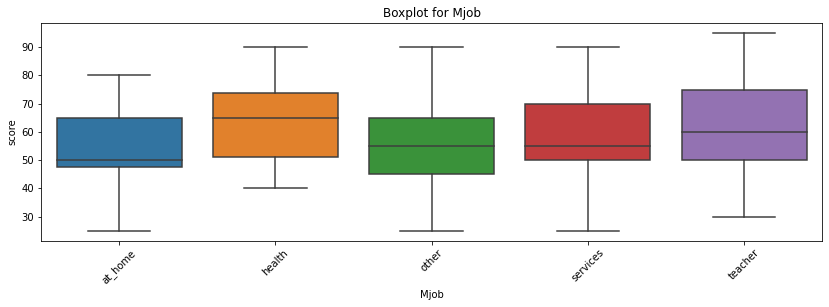

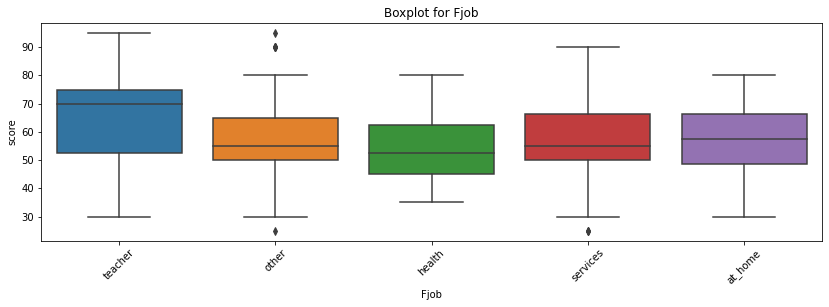

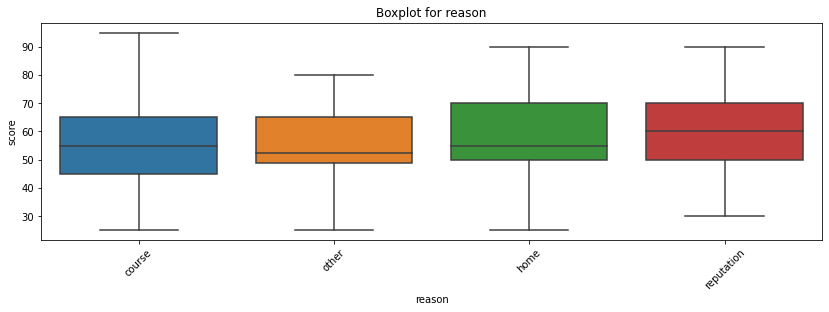

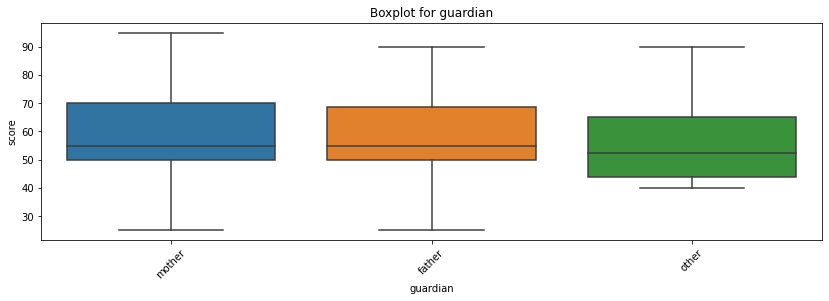

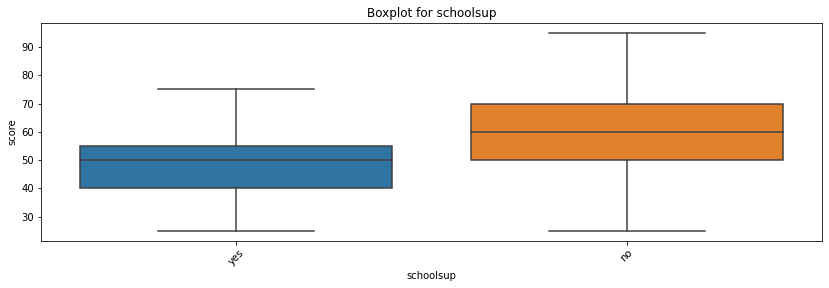

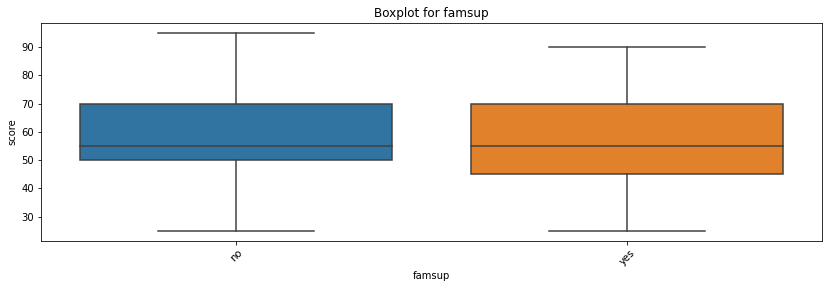

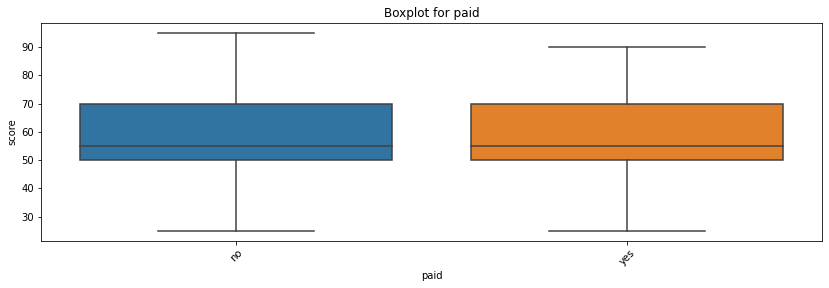

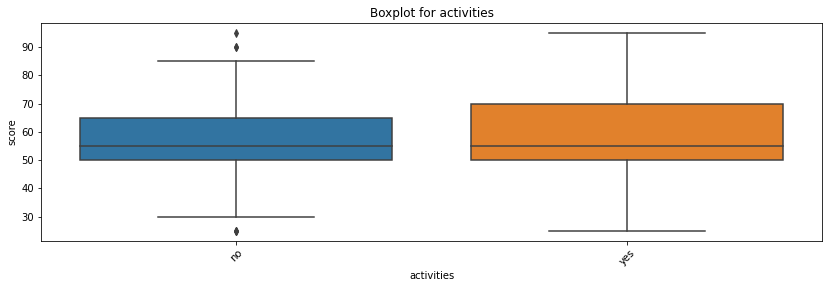

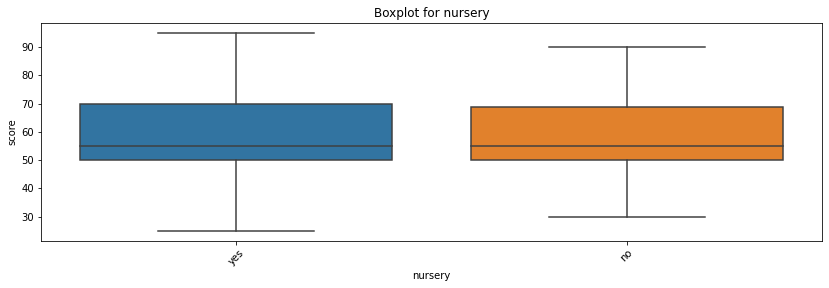

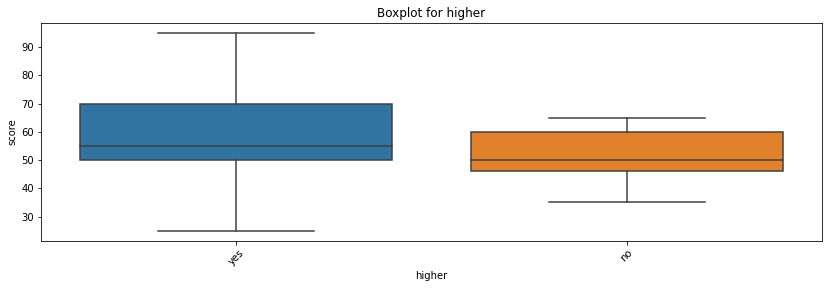

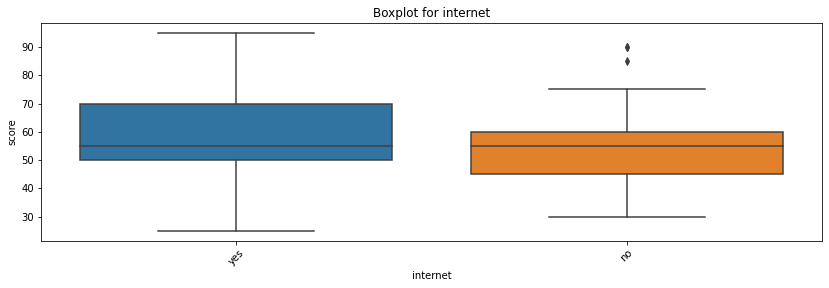

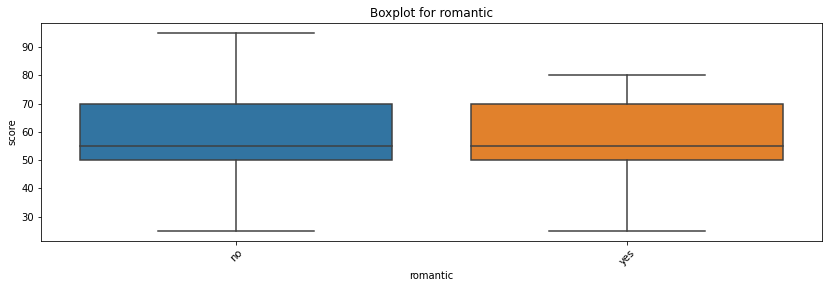

In [178]:
for col in nominative_columns: # проанализируем номинативные переменные
    get_boxplot(col)

In [179]:
for col in nominative_columns: # проанализируем статистически значимые различия
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки schoolsup


In [180]:
stud_for_model = stud.loc[:,['address','schoolsup','age', 'Medu', 'Fedu', 'studytime', 'failures', 'goout', 'absences','score']]
stud_for_model.head()

,address,schoolsup,age,Medu,Fedu,studytime,failures,goout,absences,score
0,U,yes,18,4.0,4.0,2.0,0.0,4.0,6.0,30.0
1,U,no,17,1.0,1.0,2.0,0.0,3.0,4.0,30.0
2,U,yes,15,1.0,1.0,2.0,3.0,2.0,10.0,50.0
3,U,no,15,4.0,2.0,3.0,0.0,2.0,2.0,75.0
4,U,no,16,3.0,3.0,2.0,0.0,2.0,4.0,50.0
